In [1]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.7 MB/s eta 0:00:00


In [89]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import torch

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, precision_score, recall_score

In [3]:
disaster_df = pd.read_csv('/content/train.csv')

In [4]:
disaster_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
disaster_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [6]:
df = disaster_df[['text', 'target']].copy()

array([[<Axes: title={'center': 'target'}>]], dtype=object)

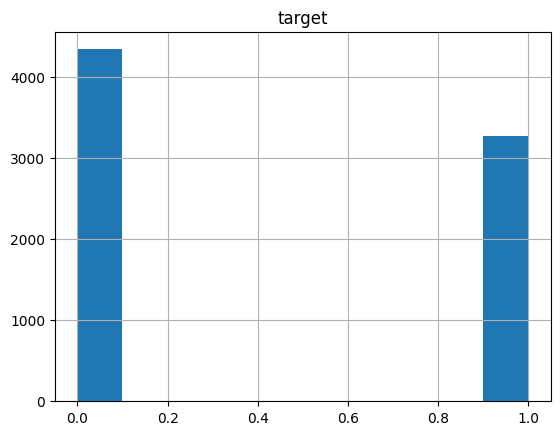

In [7]:
df.hist()

In [8]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
df.columns = ['sentence', 'label'] #neccessary renaming for bert
df.to_csv('data.csv', index = None)

In [11]:
!head data.csv

sentence,label
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
Forest fire near La Ronge Sask. Canada,1
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
"13,000 people receive #wildfires evacuation orders in California ",1
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ,1
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
I'm on top of the hill and I can see a fire in the woods...,1
There's an emergency evacuation happening now in the building across the street,1


In [53]:
from datasets import load_dataset
raw_dataset = load_dataset('csv', data_files = '/content/data.csv') #if test not present
#raw_data = load_dataset('csv', data_files = {'train' : 'data.csv', 'test' : 'test.csv'}) #if test present

  0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
raw_dataset
#raw_dataset['train']['label']

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 7613
    })
})

In [14]:
split = raw_dataset['train'].train_test_split(test_size = 0.3, seed = 42) #if test not present

In [15]:
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 5329
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2284
    })
})

In [16]:
checkpoint = 'distilbert-base-cased'

In [17]:
from transformers import AutoTokenizer

In [18]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [19]:
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [20]:
def tokenize_func(batch):
  return tokenizer(batch['sentence'], truncation = True)

In [21]:
tokenized_data = split.map(tokenize_func, batched = True)

Map:   0%|          | 0/5329 [00:00<?, ? examples/s]

Map:   0%|          | 0/2284 [00:00<?, ? examples/s]

In [22]:
tokenized_data

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 5329
    })
    test: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2284
    })
})

In [23]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

In [24]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 2)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_classifi

In [25]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           1,538
├─Dropout: 1-4                                          --
Total params: 65,783,042
Trainable params: 65,783,042
Non-trainable params: 0

In [27]:
training_args = TrainingArguments(output_dir = '/content/training_dir',
                                  evaluation_strategy = 'epoch',
                                  save_strategy = 'epoch',
                                  num_train_epochs = 3,
                                  per_device_train_batch_size = 8,
                                  per_device_eval_batch_size = 32)

In [41]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis = -1)
  acc = np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'macro')
  return{'accuracy': acc, 'f1' : f1}

In [42]:
trainer = Trainer(model,
                  training_args,
                  train_dataset = tokenized_data['train'],
                  eval_dataset = tokenized_data['test'],
                  tokenizer = tokenizer,
                  compute_metrics = compute_metrics)

In [43]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.243600,0.862814,0.784151,0.781679
2,0.200200,1.050550,0.781524,0.778117
3,0.105900,1.129897,0.791156,0.786785


TrainOutput(global_step=2001, training_loss=0.17668732443954382, metrics={'train_runtime': 137.7706, 'train_samples_per_second': 116.041, 'train_steps_per_second': 14.524, 'total_flos': 235788088726860.0, 'train_loss': 0.17668732443954382, 'epoch': 3.0})

In [44]:
!ls training_dir

checkpoint-1334  checkpoint-2001  checkpoint-667  runs


In [46]:
from transformers import pipeline

In [51]:
saved_model = pipeline('text-classification',
                       model = '/content/training_dir/checkpoint-1334',
                       device = 0)

In [64]:
test_prediction = saved_model(split['test']['sentence'])

In [65]:
test_prediction

[{'label': 'LABEL_1', 'score': 0.9990654587745667},
 {'label': 'LABEL_0', 'score': 0.9984997510910034},
 {'label': 'LABEL_1', 'score': 0.9981630444526672},
 {'label': 'LABEL_1', 'score': 0.9990705847740173},
 {'label': 'LABEL_0', 'score': 0.9976997971534729},
 {'label': 'LABEL_1', 'score': 0.9976357221603394},
 {'label': 'LABEL_0', 'score': 0.9984874725341797},
 {'label': 'LABEL_1', 'score': 0.9990824460983276},
 {'label': 'LABEL_1', 'score': 0.9842200875282288},
 {'label': 'LABEL_0', 'score': 0.9973443150520325},
 {'label': 'LABEL_0', 'score': 0.9962472319602966},
 {'label': 'LABEL_1', 'score': 0.9966616630554199},
 {'label': 'LABEL_1', 'score': 0.9547556042671204},
 {'label': 'LABEL_0', 'score': 0.9985038042068481},
 {'label': 'LABEL_1', 'score': 0.9911235570907593},
 {'label': 'LABEL_1', 'score': 0.9981690645217896},
 {'label': 'LABEL_1', 'score': 0.9978523254394531},
 {'label': 'LABEL_0', 'score': 0.9986979961395264},
 {'label': 'LABEL_1', 'score': 0.9977437257766724},
 {'label': '

In [75]:
def get_label(d):
  return int(d['label'].split('_')[1])

test_prediction = [get_label(d) for d in test_prediction]

In [76]:
test_prediction

[1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,


In [77]:
print('acc: ', accuracy_score(split['test']['label'], test_prediction)) #rechecking for sanity

acc:  0.781523642732049


In [78]:
print('f1: ', f1_score(split['test']['label'], test_prediction, average = 'macro')) #rechecking for sanity

f1:  0.7781171743695741


In [83]:
cm = confusion_matrix(split['test']['label'], test_prediction, normalize = 'true')

In [84]:
print(cm)

[[0.78810976 0.21189024]
 [0.22736626 0.77263374]]


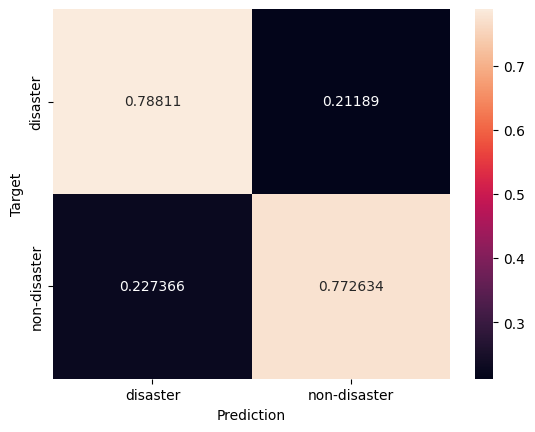

In [100]:
def plot_cm(cm):
  classes = ['disaster', 'non-disaster']
  df_cm = pd.DataFrame(cm, index = classes, columns = classes)
  ax = sn.heatmap(df_cm, annot = True, fmt = 'g')
  ax.set_xlabel('Prediction')
  ax.set_ylabel('Target')

plot_cm(cm)

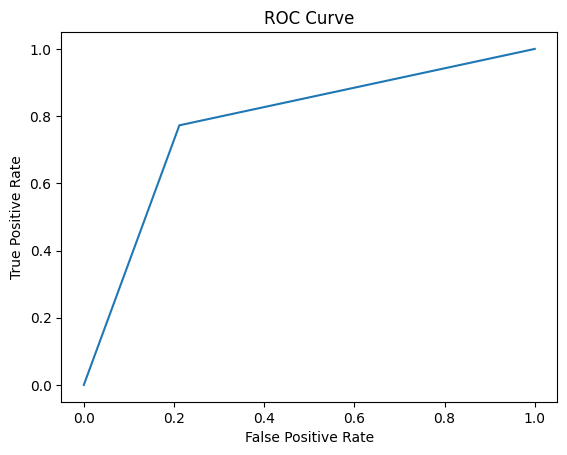

In [88]:
fpr, tpr, thresholds = roc_curve(split['test']['label'], test_prediction)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [90]:
precision = precision_score(split['test']['label'], test_prediction)
recall = recall_score(split['test']['label'], test_prediction)

In [91]:
print('Precision is {precision} and Recall is {recall}'.format(precision = precision, recall = recall))

Precision is 0.7298347910592808 and Recall is 0.772633744855967


In [96]:
!du -h

8.0K	./.config/configurations
72K	./.config/logs/2023.05.01
76K	./.config/logs
108K	./.config
4.0K	./.ipynb_checkpoints
754M	./training_dir/checkpoint-2001
754M	./training_dir/checkpoint-1334
754M	./training_dir/checkpoint-667
12K	./training_dir/runs/May03_13-04-43_f0345a8fdbce/1683119474.0256605
12K	./training_dir/runs/May03_13-04-43_f0345a8fdbce/1683119595.45519
12K	./training_dir/runs/May03_13-04-43_f0345a8fdbce/1683119255.3737726
48K	./training_dir/runs/May03_13-04-43_f0345a8fdbce
52K	./training_dir/runs
2.3G	./training_dir
55M	./sample_data
2.9G	.
